In [1]:
#imports y globals.
import shared.constants  as  const
import shared.supportedFiles as sf
#Recuperar los ficheros con los modelos modificados de la parte 1 para evitar volver a realizar todo el proceso cada vez.
#y el original de entrenamiento
TestFile= const.CSV_FILES[const.TEST_KEY_PART_2]
TrainFile= const.CSV_FILES[const.TRAIN_KEY_PART_2]


In [2]:
#añadir la columna is_female del train original al subconjunto generado en el apartado 1 y el test_id que lo usaremos en la prediccion
TrainFileInicial = const.CSV_FILES[const.TRAIN_KEY]

colum_is_female= TrainFileInicial.csvFile['is_female']
colum_train_id= TrainFileInicial.csvFile['train_id']

TrainFile.csvFile['is_female']= colum_is_female
TrainFile.csvFile['train_id']= colum_train_id
#renombrar columna test_id a train_id para homoheneizar con el del modelo de train.
TrainFile.csvFile.rename(columns= {"train_id" : "test_id"}, inplace=True)
TrainFile.csvFile.head()

,DG4,DG5_2,DG5_3,DG5_4,DL0,DL4_5,DL4_6,DL4_19,DL5,MT2,MT4_1,MT4_3,MT4_4,MT10,MT15,MT16_99,MT17_3,MT17_9,MT17_10,MT17_11,MT17_12,MT18_4,MT18_8,MT18A_2,MT18A_3,MT18A_4,FF10_1,FF14_1,FF14_11,FF19_4,FF19_5,MM1,MM3_2,IFI1_3,IFI3_3,IFI14_2,IFI14_3,IFI15_2,IFI16_3,FL13,FL15,FL16,FL17,FB22_9,FB26_1,LN1A,LN1B,LN2_1,LN2_2,LN2_3,LN2_4,is_female,test_id
0,5.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,-5.199049,2.0,1.908376,4.801013,4.485927,2.0,2.000000,2.212739,4.302615,6.035129,5.013198,6.378948,7.079258,2.053227,2.289183,2.000000,2.000000,2.000000,-0.580999,4.597656,3.993130,1.996165,3.032507,2.0,2.0,2.0,2.0,2.0,2.0,2.0,99.000000,99.0,99.0,99.0,99.0,2.0,1.884316,1.0,1.0,1.0,1.0,1.0,1.0,1,0
1,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,18.480661,2.0,1.390945,0.927307,1.070153,2.0,1.000000,2.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,2.000000,2.844542,3.760864,2.398436,1.000000,1.000000,2.000000,2.000000,2.000000,2.0,2.0,2.0,2.0,6.0,99.0,3.0,-23.024437,1.0,1.0,2.0,1.0,2.0,1.775256,3.0,3.0,1.0,1.0,3.0,4.0,1,1
2,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.000000,2.0,1.346447,0.916162,1.047901,2.0,2.000000,1.753108,6.000000,6.000000,6.000000,6.000000,2.000000,2.000000,2.000000,2.776809,3.733010,2.385032,1.000000,1.000000,2.000000,2.000000,2.000000,2.0,2.0,2.0,2.0,3.0,99.0,2.0,-25.129046,1.0,2.0,2.0,1.0,2.0,2.000000,4.0,4.0,1.0,1.0,2.0,2.0,1,2
3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-4.223750,1.0,1.000000,2.000000,2.000000,1.0,-0.039052,2.351630,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,2.000000,1.118390,0.363123,1.606762,-1.079285,4.197173,3.770835,2.208264,3.204105,2.0,2.0,2.0,2.0,3.0,99.0,2.0,174.705062,1.0,99.0,99.0,99.0,2.0,2.000000,3.0,2.0,1.0,1.0,4.0,5.0,1,3
4,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-3.347563,2.0,1.904862,4.640357,4.262709,2.0,2.000000,2.269782,3.388405,5.502091,4.589087,6.111482,6.196137,2.034764,2.303464,1.000000,2.000000,2.000000,-0.735336,4.227771,3.878437,1.875318,2.812006,2.0,2.0,2.0,2.0,2.0,4.0,3.0,7.000000,1.0,1.0,1.0,1.0,2.0,1.904660,2.0,1.0,2.0,4.0,4.0,4.0,1,4


harmonizing the train model, ensure column equivalences:
test_id exist at train model.
AA3 does not exist at train model. REMOVED from test model
AA4 does not exist at train model. REMOVED from test model
AA5 does not exist at train model. REMOVED from test model
AA6 does not exist at train model. REMOVED from test model
AA7 does not exist at train model. REMOVED from test model
AA14 does not exist at train model. REMOVED from test model
AA15 does not exist at train model. REMOVED from test model
DG1 does not exist at train model. REMOVED from test model
DG3 does not exist at train model. REMOVED from test model
DG3A does not exist at train model. REMOVED from test model
DG4 exist at train model.
DG5_1 does not exist at train model. REMOVED from test model
DG5_2 exist at train model.
DG5_3 exist at train model.
DG5_4 exist at train model.
DG5_5 does not exist at train model. REMOVED from test model
DG5_6 does not exist at train model. REMOVED from test model
DG5_7 does not exist at tra

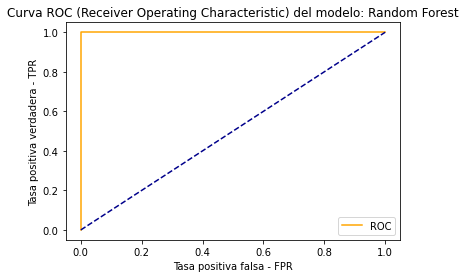

AUC calculada para el modelo Random Forest: 1.00
exportando el mejor de los modelos:
Generado Random Forest_submission.csv


In [3]:
#Modelos predictivos y calidad de los mismos con curva ROC
#      Se usan varios algoritmos de prediccion para determinar cuál es el mejor:
#        predictColumn es la columna a ser predecida. El modelo entrenado se asume que es el contenido en la instancia del helper. Self.
#        identifierColumn: normalmente es una columna que hace las veces de indexador identificando de forma unica un registro.
#        testModel: El modelo de test contra el que se realiza la predicción. (Pandas Dataframe)
#        
#        Antes de realizar la predicción el algoritmo limpia el conjunto de datos de test de aquellas columnas que no existan en el modelo entrenado.
#
#        El modo Silent activa la salida de texto informativo
#        El modo ROC_Curve genera la curva ROC para cada algoritmo ayudando de forma visual a la determinación del mejor.
#        Retorna el mejor algoritmo en base a la mejor precisión para cada uno de los algorimos empleados en la estimación que son los siguientes:
#          - Regresión logística
#          - Random Forest
#          - Árboles de decisión
#          - Bayesiano (Naybe)
#         - K-NeigthBors (Vecindad de 5)
# -----------------------------------------------------------------------------------------------------------------------------------------------
 
TrainFile.getBestPredictionAlgorithm('is_female', 'test_id', TestFile.csvFile, Silent=False, ROC_Curve=True)